# Introduction to Azure ML R notebooks

## Summary

Introduce situations where Azure Machine Learning (ML) R notebooks can be used. Fit a model using R, then publish the model as a web service to Azure ML Studio.

## Description

The purpose of this notebook is to demonstrate how to use Jupyter notebooks on the Azure Machine Learning Studio to develop a model in R and publish a web service based on the model.

### Using Azure ML notebooks

For data scientists new to Azure ML and accustomed to doing all analytical work using R on local computers, Azure Machine Learning makes it possible to write R notebooks on the cloud. So anyone with internet access can work with R from a web browser. 

If you use R and understand the basics of Azure ML, notebooks make it possible to develop your models in R and then operationalize them easily. 

Data scientists who are comfortable with both R and Azure ML Experiments, can use these together in different ways:

* To explore data from an Azure ML Experiment. For example, you can use a notebook to visualize your data in different ways.
* To fit models and use techniques that are not available in Azure ML Experiments yet. For example, R offers more options in terms of variable selection techniques and a wider variety of models. You can also used it for time series analysis.
* To test code before using it in the "Execute R Script" module of Azure ML Experiments.

### Target audience

The target audience of this notebook are R users who have a basic understanding of Azure ML. If you are new to Azure ML, Section 2 of the [Data Scientists' Guide][guide link] provides enough information for you to follow this tutorial. 

[guide link]: https://gallery.cortanaanalytics.com/Experiment/Tutorial-for-Data-Scientists-3


## Data

In this example, you use the Boston housing data from the R package `MASS`.  The `Boston` dataset contains 506 rows and 14 columns. Available information includes median home price, average number of rooms per dwelling, crime rate by town, etc. More information about this dataset can be found by typing `?Boston` or `help(Boston)` in an R terminal, or at this [UCI page][uci link].

To run a cell, select it and press CTRL+ENTER or SHIFT+ENTER.

[uci link]: https://archive.ics.uci.edu/ml/datasets/Housing

In [2]:
# load the library to use the Boston dataset
library(MASS)
?Boston

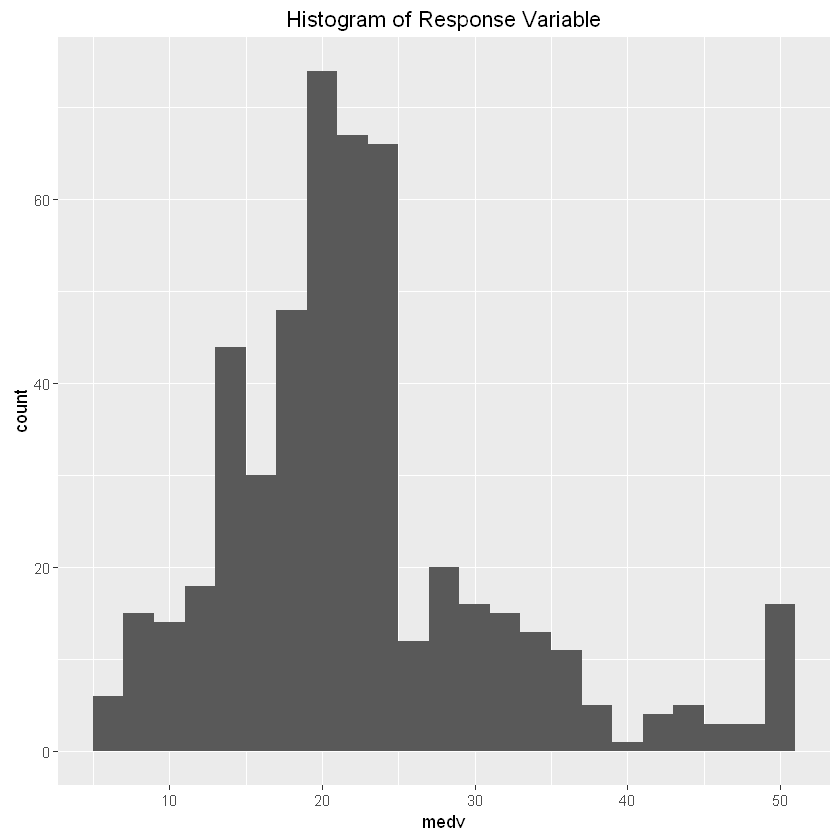

In [3]:
# library for plotting
library(ggplot2) 
# plot distribution of the response variable
ggplot(Boston, aes(x=medv)) + 
  geom_histogram(binwidth=2) +
  ggtitle("Histogram of Response Variable")

## A linear regression model

For illustration purposes, use `medv`, median home price, as the response variable and all other variables as predictors.

[uci link]: https://archive.ics.uci.edu/ml/datasets/Housing

In [4]:
# fit a model using all variables except medv as predictors
lm1 <- lm(medv ~ ., data = Boston)

# check model performance
summary(lm1)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

Now compute some error measures:

In [5]:
pred <- predict(lm1)
error <- pred - Boston$medv
mae <- mean(abs(error))
rmse <- sqrt(mean((error)^2))
rae <- mean(abs(error)) / mean(abs(Boston$medv - mean(Boston$medv)))
rse <- mean((error)^2) / mean((Boston$medv - mean(Boston$medv))^2)

cat("Mean Absolute Error:", round(mae, 6), "\n")
cat("Root Mean Squared Error:", round(rmse, 6), "\n")
cat("Relative Absolute Error:", round(rae, 6), "\n")
cat("Relative Squared Error:", round(rse, 6), "\n")

Mean Absolute Error: 3.270863 
Root Mean Squared Error: 4.679191 
Relative Absolute Error: 0.492066 
Relative Squared Error: 0.259357 


## Web service

### Deploy a web service

With the developed model, you can deploy a web service so that others can use it to make predictions. The `AzureML` R package will be used for this purpose. You'll need to provide the **workspace ID** and **authorization token** for an Azure ML workspace. The two screenshots below show where you can find them in your workspace. Either primary or secondary authorization token can be used. 

#### Finding your workspace ID

<img src="https://az712634.vo.msecnd.net/notebooks/952a5db4-91f6-11e5-9710-8805451194dd.PNG" width = "800", alt = "Finding your workspace ID">

#### Finding your authorization token

<img src="https://az712634.vo.msecnd.net/notebooks/09746e40-91f6-11e5-9dfa-6ac897e3c426.PNG" width = "800", alt = "Finding your authorization token">

### Publishing a web service

You use the function `publishWebservice()` to deploy your model.

**Important: Publishing and consuming a web service requires you to have valid Azure ML credentials. Concretely, if you logged in using a Guest account, you will get an error. If this is the case, please log in using your Microsoft or Azure account and try again.**

In [7]:
# load the library
library(AzureML)

# If you use workspace() in a Jupyter notebook, you don't need to specify credentials,
# since the settings are stored for you in a local file.
# If you use this function on your own machine, specify your credentials. See ?workspace.

if(file.exists("~/.azureml/settings.json")){
    ws <- workspace()
} else {
    workspace_id <- "ENTER AZURE ML WORKSPACE ID (SEE ABOVE)"
    authorization_token <- "ENTER AZURE ML WORKSPACE AUTH TOKEN (SEE ABOVE)"
    ws <- workspace(workspace_id, authorization_token)
}

# define predict function
mypredict <- function(newdata){
  predict(lm1, newdata)
}

# a sample with predictor information
newdata <- Boston[1:5, ]

# test the prediction function
data.frame(
    actual = newdata$medv, 
    prediction = mypredict(newdata))

actual,prediction
24.0,30.00384
21.6,25.02556
34.7,30.56760
33.4,28.60704
36.2,27.94352


In [8]:
# publish the service
ep <- publishWebService(ws = ws, 
                        fun = mypredict, 
                        name = "HousePricePrediction", 
                        inputSchema = newdata)
# str(ep)

converting `inputSchema` to data frame


### Consume a web service

After setting up a web service, you can use R to consume the model, either in the same session, or by saving some data about the web service, in any other (future) R session.

#### In-session consumption

If you are consuming the web service in the same session that the web service was set up, you can refer to the endpoint directly.

**Important: Publishing and consuming a web service requires you to have valid Azure ML credentials. Concretely, if you logged in using a Guest account, you will get an error. If this is the case, please log in using your Microsoft or Azure account and try again.**

In [9]:
pred <- consume(ep, newdata)$ans
# Note that this operation may take several seconds to complete.
# You may see several retry attempts, before the service returns with a value

In [10]:
data.frame(actual = newdata$medv, prediction = pred)

actual,prediction
24.0,30.00384
21.6,25.02556
34.7,30.56760
33.4,28.60704
36.2,27.94352


#### Out-of-session consumption

If you consume the web service in a new session, you need to save the workspace information - workspace id and  authorization token - and web service ID. Such information can then be used by the `consume()` function:

**Important: consuming a web service requires you to have valid Azure ML credentials. Concretely, if you logged in using a Guest account, you will get an error.**

In [11]:
# Option 1: Create a temporary file to store the endpoint data
tf <- tempfile(fileext = ".rds")
saveRDS(ep, file = tf)

# Read the endpoint data from file
endpoint <- readRDS(tf)

# # Option 2: save workspace ID, authorization token and service ID
# ws_id <- ws$id
# ws_auth <- ws$.auth
# # save web service ID
# service_id <- ep$WebServiceId
# # define workspace, this is necessary if you are running outside of the service deployment session
# ws <- workspace(
#    id = ws_id,
#    auth = ws_auth
# )
# # defind endpoint based on workspace and service ID information
# endpoint <- endpoints(ws, service_id)

In [12]:
# consume
pred <- consume(endpoint, newdata)$ans
# check predictions
data.frame(
    actual = newdata$medv, 
    prediction = mypredict(newdata))

actual,prediction
24.0,30.00384
21.6,25.02556
34.7,30.56760
33.4,28.60704
36.2,27.94352


### Updating a web service

After making improvements to a model, you can update the existing web service. For this purpose you can use the `updateWebService()` function by specifying the web service ID. 

In [13]:
# To update a web service, you need the WebServiceId

# define test function
mypredictnew <- function(newdata){
  predict(lm1, newdata) + 100 # Add 100 for illustration purpose only
}

# update service with the new function
ep_update <- updateWebService(
  ws = ws,
  fun = mypredictnew, 
  name = "not necessary", # this does not matter since serviceId is provided
  inputSchema = newdata, 
  serviceId = ep$WebServiceId
)

# str(ep_update)

converting `inputSchema` to data frame


## Conclusion

In this example, you learned how to fit a model, deploy the model on Azure and consume the service.

The `AzureML`R package also allows you to read data from Azure ML workspace or experiments, making it possible for users to have a seamless experience between Azure ML experiments and notebooks.

You can find more details in the `AzureML` package help.